# Classifiers in Python


## Different Classifiers

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf_grad = GradientBoostingClassifier(random_state=0)
fitted = clf_grad.fit(X_train, y_train)

clf_tree = DecisionTreeClassifier(random_state=0)
fitted_tree = clf_tree.fit(X_train, y_train)

clf_random = RandomForestClassifier(random_state=0)
fitted_random = clf_random.fit(X_train, y_train)

## Lab Instruction

### Part 1: Importing the Dataset

Import "Carseats.csv".

In [3]:
import pandas as pd
CarSeat = pd.read_csv("Carseats.csv")

In [4]:
CarSeat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
CarSeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Part 2: Preprocessing

Preprocess the dataset.

In [6]:
CarSeat.isna().mean()

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

In [7]:
# Converting the sale columns Sale > 8 = Good, Sale <= 8 = Bad
CarSeat["Sales_cat"] = CarSeat["Sales"].map(lambda x : 1 if x > 8 else 0)

In [8]:
CarSeat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [9]:
y = CarSeat.pop("Sales_cat")

In [10]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sales_cat, dtype: int64

In [11]:
x = CarSeat.iloc[:,1:].copy()

In [12]:
x_dummy = pd.concat([pd.get_dummies(x.select_dtypes(include="object")),
                    x.select_dtypes(include=["float64","int64"])],axis=1);
x_dummy.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1,0,0,0,1,0,1,138,73,11,276,120,42,17
1,0,1,0,0,1,0,1,111,48,16,260,83,65,10
2,0,0,1,0,1,0,1,113,35,10,269,80,59,12
3,0,0,1,0,1,0,1,117,100,4,466,97,55,14
4,1,0,0,0,1,1,0,141,64,3,340,128,38,13


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(x_dummy, y, test_size=0.60, random_state=0)

### Part 3: Perform Classifiers 

1. Decision Tree
2. Random Forest
3. Extreme Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf_grad = GradientBoostingClassifier(random_state=0)
fitted = clf_grad.fit(x_train, y_train)

clf_tree = DecisionTreeClassifier(random_state=0)
fitted_tree = clf_tree.fit(x_train, y_train)

clf_random = RandomForestClassifier(random_state=0)
fitted_random = clf_random.fit(x_train, y_train)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Use trained model to predict training set and calculate accuracy score
yhat_train = clf_grad.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf_grad.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[96  0]
 [ 0 64]]

accuracy score for test dataset: 81.25 %
confusion matrix for test dataset: 

[[122  18]
 [ 27  73]]


In [16]:
#Use trained model to predict training set and calculate accuracy score
yhat_train = clf_tree.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf_tree.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[96  0]
 [ 0 64]]

accuracy score for test dataset: 68.33 %
confusion matrix for test dataset: 

[[107  33]
 [ 43  57]]


In [17]:
#Use trained model to predict training set and calculate accuracy score
yhat_train = clf_random.predict(x_train)
acc_train = accuracy_score(y_train, yhat_train)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test = clf_random.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 97.50 %
confusion matrix for train dataset: 

[[95  1]
 [ 3 61]]

accuracy score for test dataset: 76.67 %
confusion matrix for test dataset: 

[[125  15]
 [ 41  59]]


### Cross validation

Gradient Boosting

In [18]:
from sklearn.model_selection import cross_validate

scoring = ['precision','recall','accuracy','f1'] 
scores = cross_validate(clf_grad, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time           0.038789
score_time         0.003125
test_precision     0.691668
train_precision    1.000000
test_recall        0.579487
train_recall       1.000000
test_accuracy      0.725684
train_accuracy     1.000000
test_f1            0.623660
train_f1           1.000000
dtype: float64

Decision tree

In [19]:
from sklearn.model_selection import cross_validate

scoring = ['precision','recall','accuracy','f1']
scores = cross_validate(clf_tree, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time           0.002006
score_time         0.002590
test_precision     0.509832
train_precision    1.000000
test_recall        0.574359
train_recall       1.000000
test_accuracy      0.600587
train_accuracy     1.000000
test_f1            0.533660
train_f1           1.000000
dtype: float64

Random forest

In [20]:
from sklearn.model_selection import cross_validate

scoring = ['precision','recall','accuracy','f1']
scores = cross_validate(clf_random, x_train, y_train,scoring = scoring,cv = 5, return_train_score=True)
pd.DataFrame(scores).mean()

fit_time           0.006981
score_time         0.002792
test_precision     0.683492
train_precision    0.996078
test_recall        0.439744
train_recall       0.964857
test_accuracy      0.694422
train_accuracy     0.984399
test_f1            0.530217
train_f1           0.979905
dtype: float64

XG boots

In [23]:
import xgboost as xgb

DM_train = xgb.DMatrix(data = x_train, label = y_train)
DM_test = xgb.DMatrix(data = x_test, label = y_test)

### More tuning

the general hyper parameter for tuning in these algorithms

In [ ]:
DecisionTreeClassifier(max_depth=6)
RandomForestClassifier(max_features=13, random_state=1)
GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=0)

### Feature importance

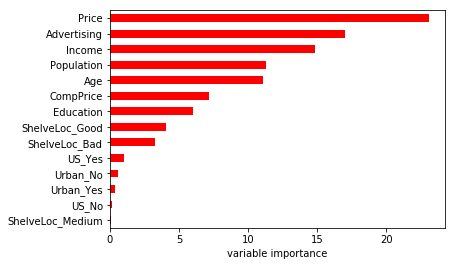

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

regr2 = RandomForestRegressor(random_state = 0)
regr2.fit(x_train,y_train)
pred = regr2.predict(x_test)
mean_squared_error(pred, y_test)

Importance = pd.DataFrame({"importance":regr2.feature_importances_*100}, index=x_dummy.columns)

Importance.sort_values(by="importance",axis=0,ascending=True).plot(kind="barh",color="red")
plt.xlabel("variable importance")
plt.gca().legend_ = None

In [64]:
Selected = Importance[Importance > 1].dropna().index
print(Selected)

Index(['ShelveLoc_Bad', 'ShelveLoc_Good', 'US_Yes', 'CompPrice', 'Income',
       'Advertising', 'Population', 'Price', 'Age', 'Education'],
      dtype='object')


In [65]:
x_selected = x_dummy.loc[:,Selected].copy()
x_selected.head()

,ShelveLoc_Bad,ShelveLoc_Good,US_Yes,CompPrice,Income,Advertising,Population,Price,Age,Education
0,1,0,1,138,73,11,276,120,42,17
1,0,1,1,111,48,16,260,83,65,10
2,0,0,1,113,35,10,269,80,59,12
3,0,0,1,117,100,4,466,97,55,14
4,1,0,0,141,64,3,340,128,38,13


In [66]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 =  train_test_split(x_selected, y, test_size=0.60, random_state=0)
display(x_train2.head())
display(y_train2.head())

,ShelveLoc_Bad,ShelveLoc_Good,US_Yes,CompPrice,Income,Advertising,Population,Price,Age,Education
397,0,0,1,162,26,12,368,159,40,18
118,0,0,1,112,88,2,243,99,62,11
254,0,1,1,108,104,23,353,129,37,17
188,0,0,0,116,37,0,426,90,76,15
208,1,0,0,86,54,0,497,64,33,12


397    0
118    0
254    1
188    1
208    0
Name: Sales_cat, dtype: int64

In [79]:
clf_grad_tune = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.01, max_depth=4, random_state=0)

from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth":[2,3,4,5,6,7,8,9,10]}
clf_grad_tune = GridSearchCV(GradientBoostingClassifier(n_estimators=3000, learning_rate=0.01, max_depth=4, random_state=0),
                            param_grid=param_grid,
                            cv=5)


In [81]:
clf_grad_pred = clf_grad_tune.fit(x_train,y_train)

In [82]:
clf_grad_pred.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3000,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix


#Use trained model to predict training set and calculate accuracy score
yhat_train2 = clf_grad_tune.predict(x_train2)
acc_train = accuracy_score(y_train2, yhat_train2)

print("accuracy score for train dataset: {} %".format('%0.2f'%(acc_train*100)))
print("confusion matrix for train dataset: \n")
print(confusion_matrix(y_train,yhat_train))


#Use trained model to predict testing set and calculate accuracy score
yhat_test2 = clf_grad_tune.predict(x_test2)
acc_test = accuracy_score(y_test2, yhat_test2)

print("\naccuracy score for test dataset: {} %".format('%0.2f'%(acc_test*100)))
print("confusion matrix for test dataset: \n")
print(confusion_matrix(y_test, yhat_test))

accuracy score for train dataset: 100.00 %
confusion matrix for train dataset: 

[[95  1]
 [ 3 61]]

accuracy score for test dataset: 81.25 %
confusion matrix for test dataset: 

[[125  15]
 [ 41  59]]


In [89]:
from sklearn.model_selection import cross_validate

scoring = ['precision','recall','accuracy','f1'] 
scores = cross_validate(clf_grad_pred.best_estimator_, x_test2, y_test2,scoring = scoring,cv = 5, return_train_score=True)

In [90]:
display(pd.DataFrame(scores))
display(pd.DataFrame(scores).mean())

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy,test_f1,train_f1
0,0.842067,0.008088,0.777778,1.0,0.70,1.0,0.791667,1.0,0.736842,1.0
1,0.773636,0.010211,0.750000,1.0,0.90,1.0,0.833333,1.0,0.818182,1.0
2,0.783116,0.008124,0.750000,1.0,0.75,1.0,0.791667,1.0,0.750000,1.0
3,0.773007,0.002118,0.777778,1.0,0.70,1.0,0.791667,1.0,0.736842,1.0
4,0.764557,0.012277,0.842105,1.0,0.80,1.0,0.854167,1.0,0.820513,1.0


fit_time           0.787277
score_time         0.008164
test_precision     0.779532
train_precision    1.000000
test_recall        0.770000
train_recall       1.000000
test_accuracy      0.812500
train_accuracy     1.000000
test_f1            0.772476
train_f1           1.000000
dtype: float64

f1 score better than all features by 3% <br>
the more n_estimator, the better it gets

## Part 4: Analyze the result

After you perform Decision Tree, answer the following question.

1. What is the Accuracy Score?
2. If you change your preprosessing method, can you improve the model?
3. If you change your parameters setting, can you improve the model?

Testing F1 ranking XGboots > Random > Decision tree

## Part 5: Model Comparison

Find the difference in performance between Decision Tree, RandomForest, and Gradient Boosting Classifier.

to make a bin <br>
there have pd.cut or pd.qcut for preprocessing data